In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [3]:
data=pd.read_csv("E:\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

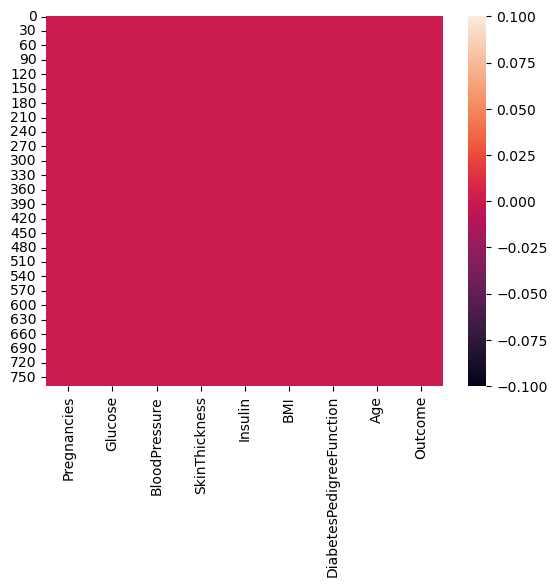

In [4]:
sns.heatmap(data.isnull())

In [5]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

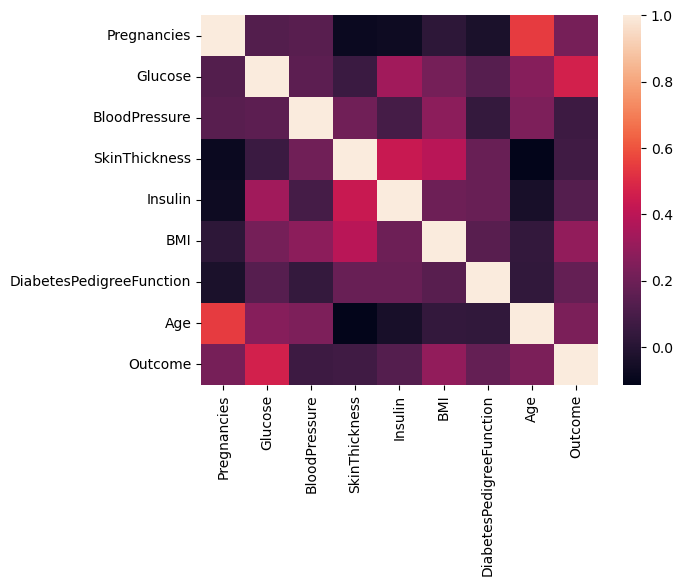

In [6]:
sns.heatmap(data.corr())

In [11]:
#standardize the feature
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [8]:
#preparing the data
X=data.drop("Outcome",axis=1)
Y=data['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)



In [12]:
#train a random classifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,Y_train)

RandomForestClassifier(random_state=42)

In [22]:
#make prediction on the test set
prediction=model.predict(X_test_scaled)
print(prediction)


[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [23]:
#evaluate the model
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)

0.7207792207792207


In [24]:
#display the first few rows
print(data.head())
#checking for missing values
print(data.isnull().sum())
#statistical summary
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies  

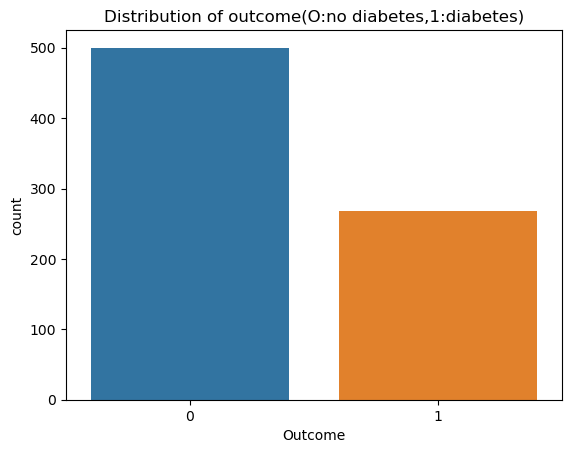

In [25]:
#distribution of target variable
sns.countplot(x='Outcome',data=data)
plt.title('Distribution of outcome(O:no diabetes,1:diabetes)')
plt.show()

In [27]:
#additonal evaluation metrics
print('\n classification report:')
print(classification_report(Y_test,prediction))


 classification report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [28]:
print('\nconfusion matrix:')
print(confusion_matrix(Y_test,prediction))


confusion matrix:
[[77 22]
 [21 34]]


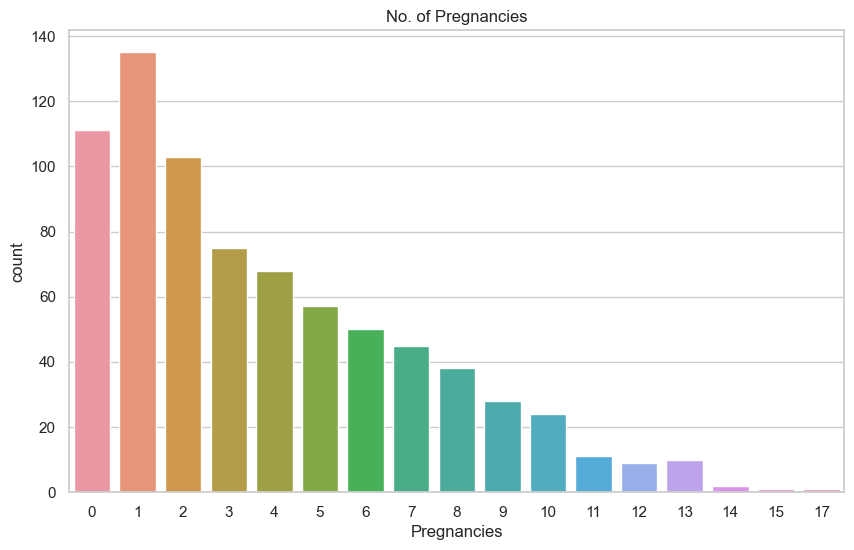

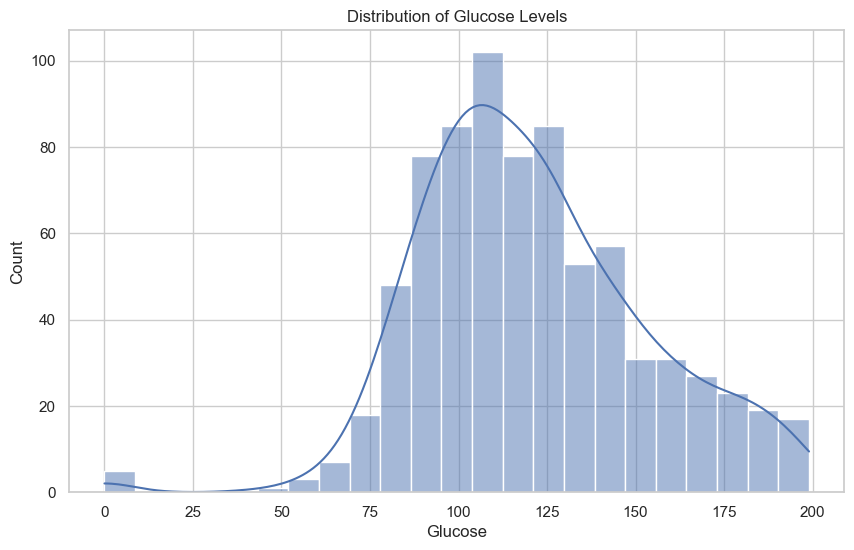

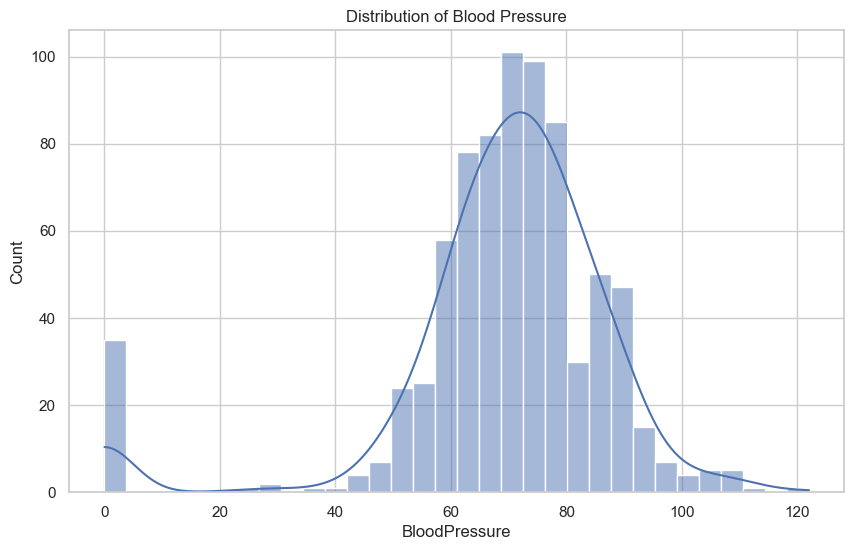

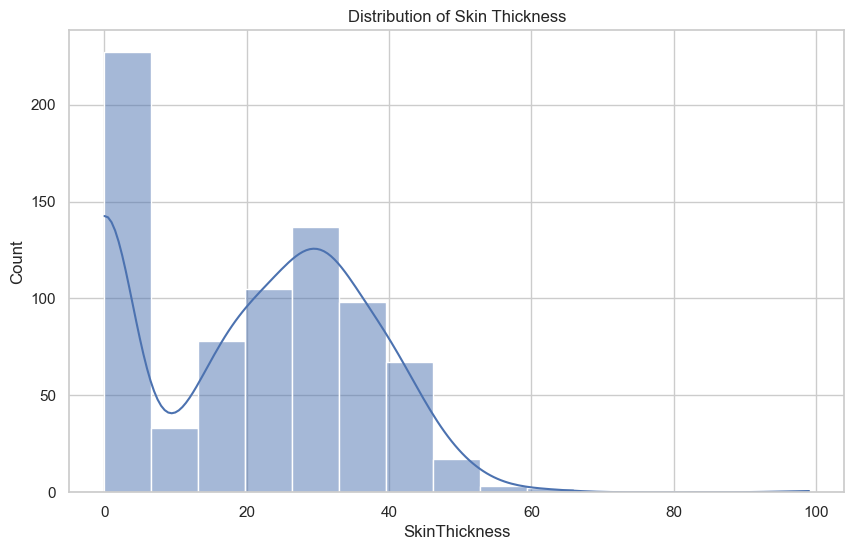

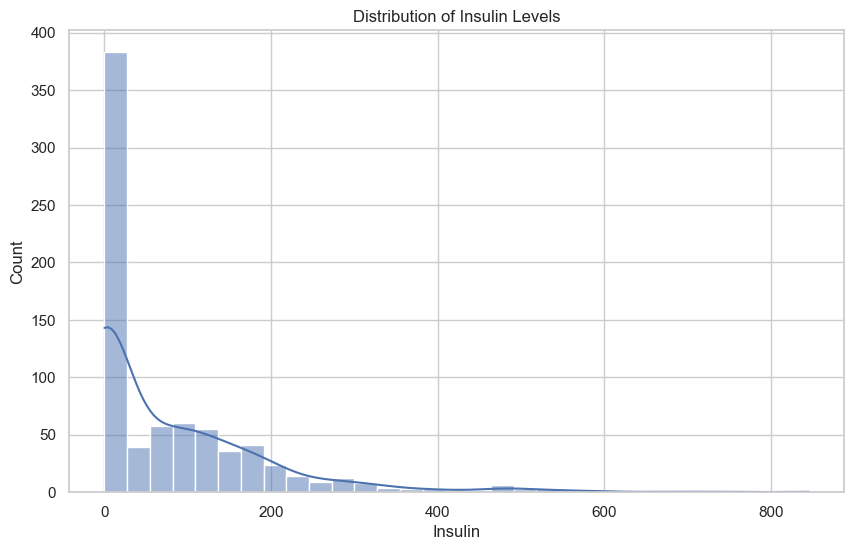

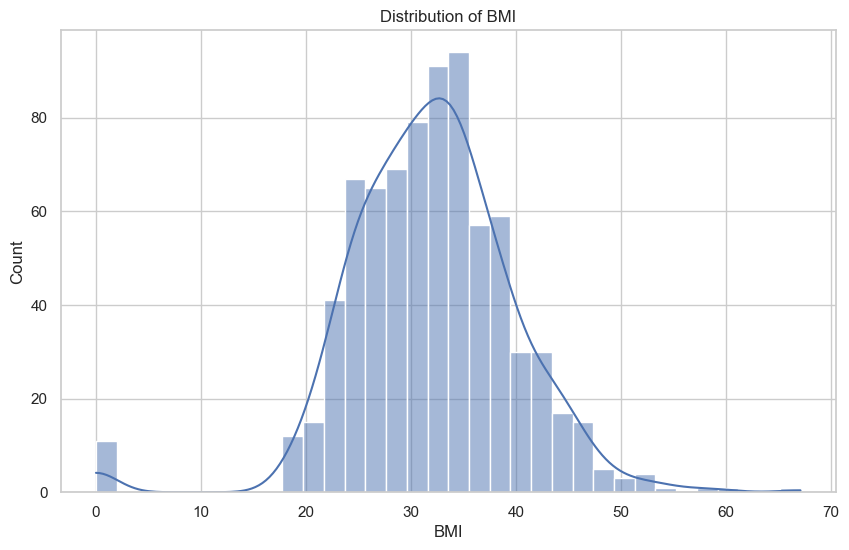

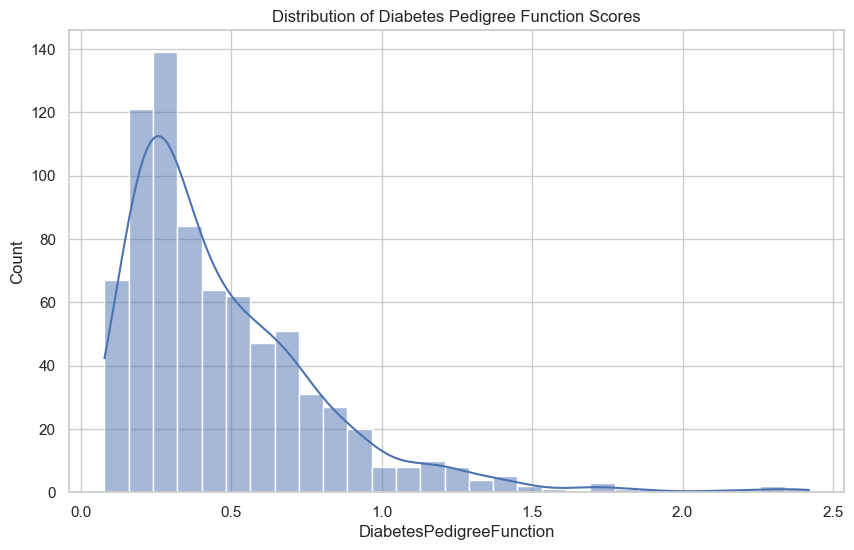

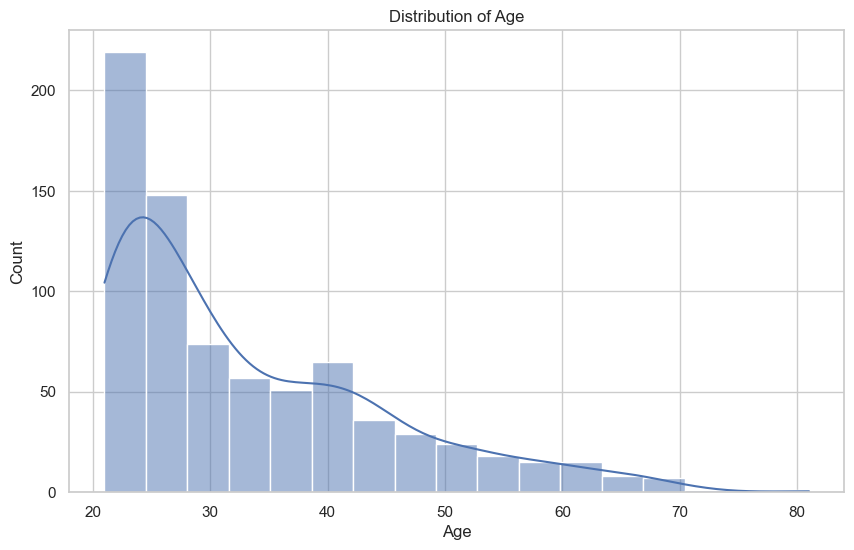

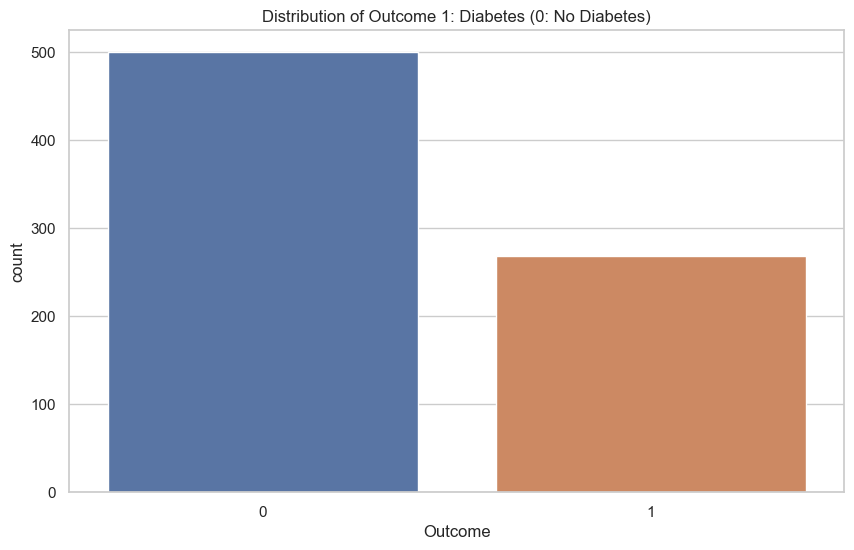

In [31]:
sns.set(style="whitegrid")
#1.Pregnancies
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies',data=data)
plt.title('No. of Pregnancies')
plt.show()
#2.Glucose
plt.figure(figsize=(10,6))
sns.histplot(x='Glucose',data=data,kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()
#3.Blood Pressure
plt.figure(figsize=(10,6))
sns.histplot(x='BloodPressure',data=data,kde=True)
plt.title('Distribution of Blood Pressure')
plt.show()
#4.Skin THickness
plt.figure(figsize=(10,6))
sns.histplot(x='SkinThickness',data=data,kde=True)
plt.title('Distribution of Skin Thickness')
plt.show()
#5.Insulin
plt.figure(figsize=(10,6))
sns.histplot(x='Insulin',data=data,kde=True)
plt.title('Distribution of Insulin Levels')
plt.show()
#6.BMI
plt.figure(figsize=(10,6))
sns.histplot(x='BMI',data=data,kde=True)
plt.title('Distribution of BMI')
plt.show()
#7.Diabetes Pedigree Function
plt.figure(figsize=(10,6))
sns.histplot(x='DiabetesPedigreeFunction',data=data,kde=True)
plt.title('Distribution of Diabetes Pedigree Function Scores')
plt.show()
#8.Age
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=data,kde=True)
plt.title('Distribution of Age')
plt.show()
#9.Outcome
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome',data=data)
plt.title('Distribution of Outcome 1: Diabetes (0: No Diabetes)')
plt.show()


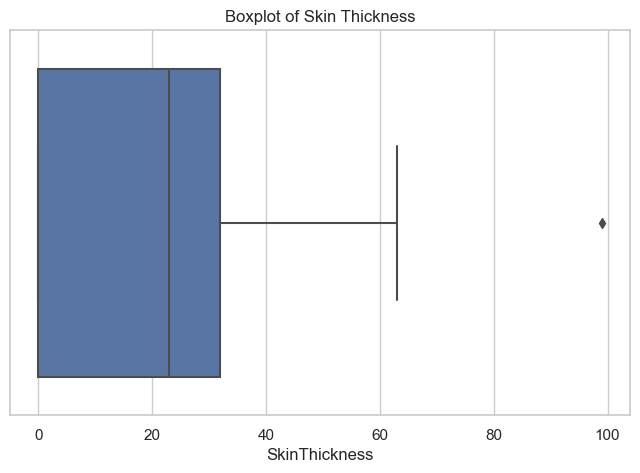

In [33]:
#boxplot of skin thickness
plt.figure(figsize=(8,5))
sns.boxplot(x='SkinThickness',data=data)
plt.title('Boxplot of Skin Thickness')
plt.show()

In [34]:
#outliners in skin thickness
Q1_skin_thickness=data['SkinThickness'].quantile(0.25)
Q3_skin_thickness=data['SkinThickness'].quantile(0.75)
IQR_skin_thickness=Q3_skin_thickness-Q1_skin_thickness
lower_bound_skin_thickness=Q1_skin_thickness-1.5*IQR_skin_thickness
upper_bound_skin_thickness=Q3_skin_thickness+1.5*IQR_skin_thickness
outliers_skin_thickness=data[(data['SkinThickness']<lower_bound_skin_thickness)|(data['SkinThickness']>upper_bound_skin_thickness)]
print(f'Number of outliers in SkinThickness:{len(outliers_skin_thickness)}')


Number of outliers in SkinThickness:1


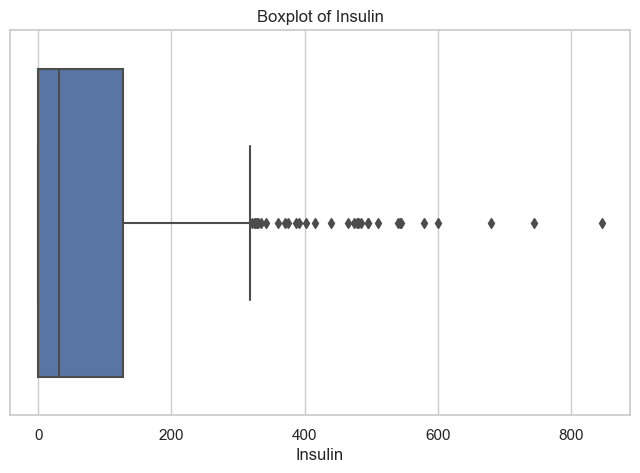

In [35]:
#boxplot of insulin
plt.figure(figsize=(8,5))
sns.boxplot(x='Insulin',data=data)
plt.title('Boxplot of Insulin')
plt.show()

In [36]:
#outliners in insulin
Q1_insulin = data['Insulin'].quantile(0.25)
Q3_insulin = data['Insulin'].quantile(0.75)
IQR_insulin = Q3_insulin - Q1_insulin
lower_bound_insulin = Q1_insulin - 1.5 * IQR_insulin
upper_bound_insulin = Q3_insulin + 1.5 * IQR_insulin
outliers_insulin = data[(data['Insulin'] < lower_bound_insulin) |(data['Insulin'] > upper_bound_insulin)]
print(f'Number of outliers in Insulin: {len(outliers_insulin)}')

Number of outliers in Insulin: 34


D:\Users\RAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


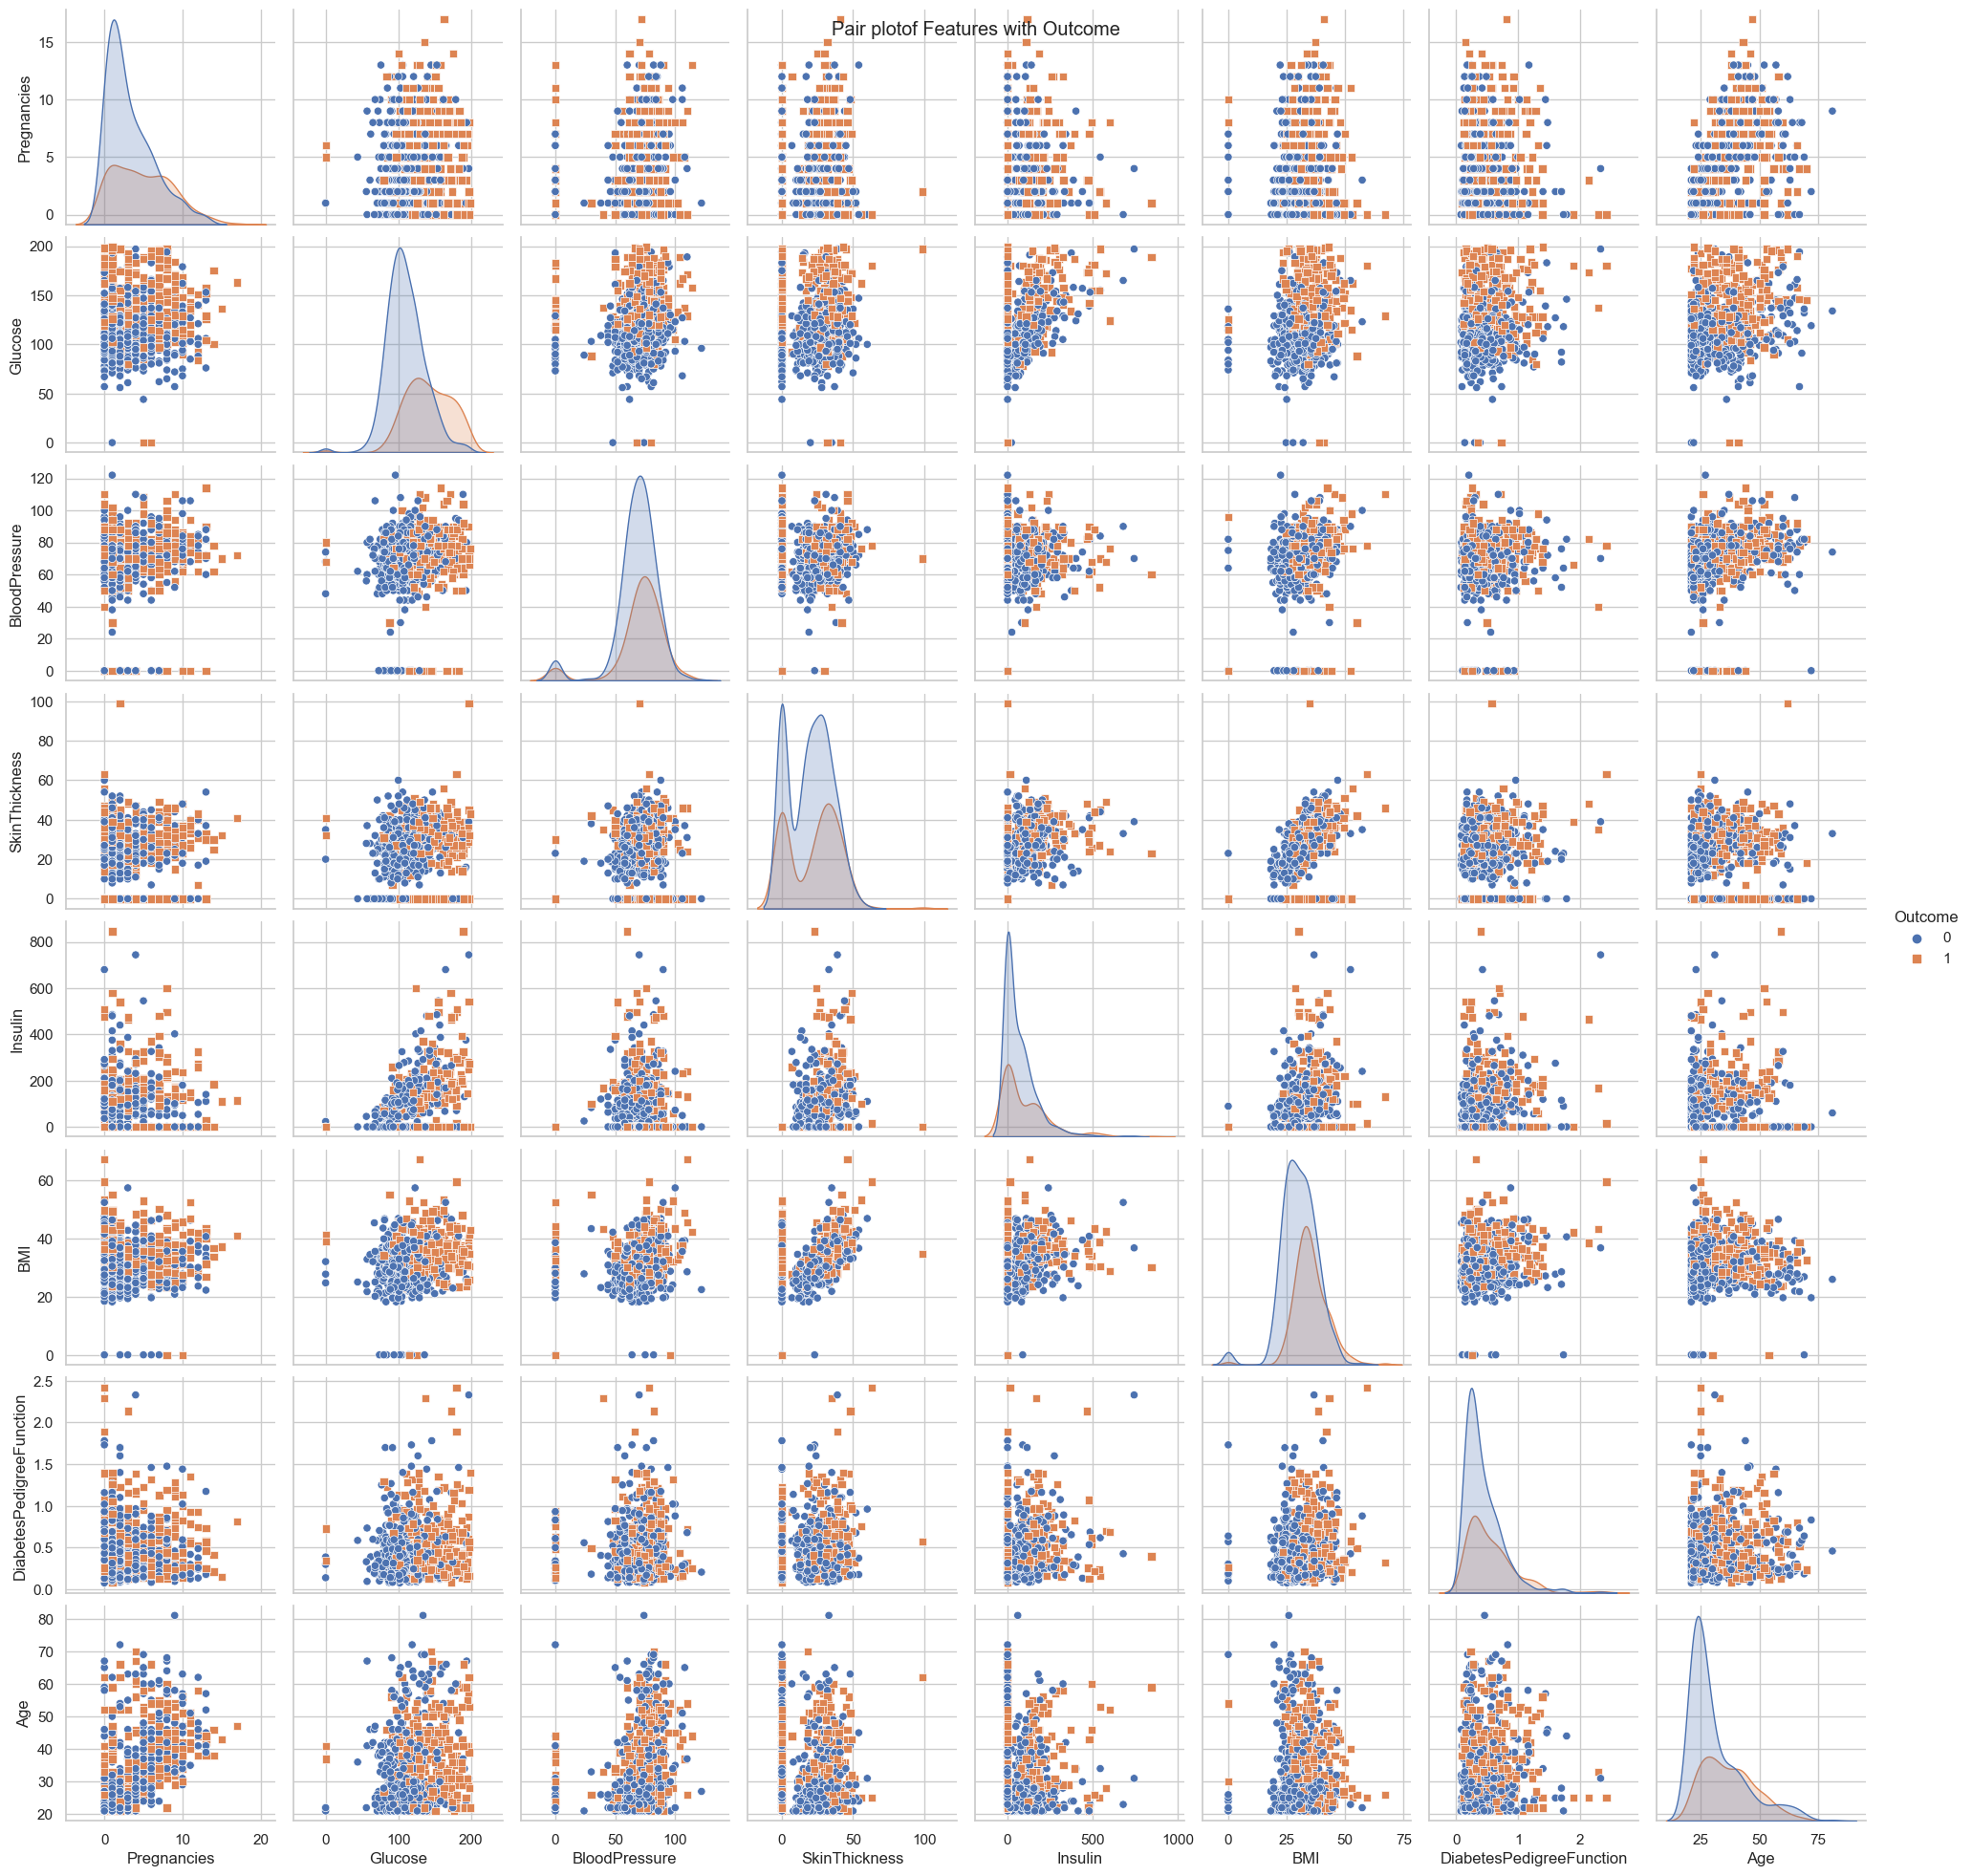

In [37]:
#visualization between features and pair plot
sns.pairplot(data,hue='Outcome',diag_kind='kde',markers=["o","s"])
plt.suptitle('Pair plotof Features with Outcome')
plt.show()

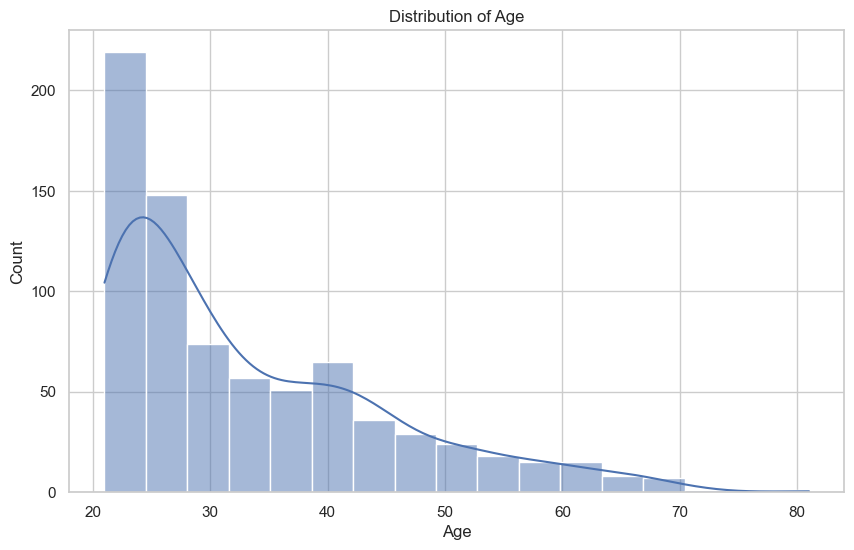

In [39]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=data, kde=True)
plt.title('Distribution of Age')
plt.show()


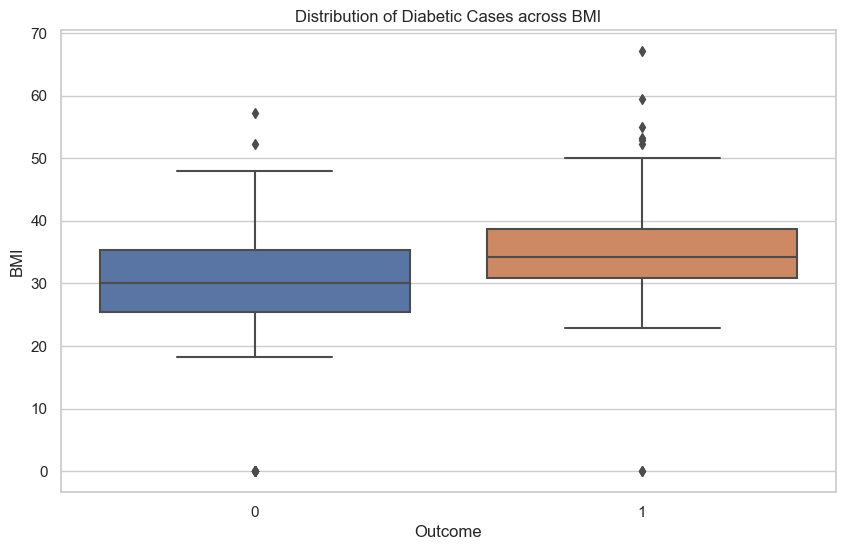

In [40]:
#Distribution of cases accross BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('Distribution of Diabetic Cases across BMI')
plt.show()

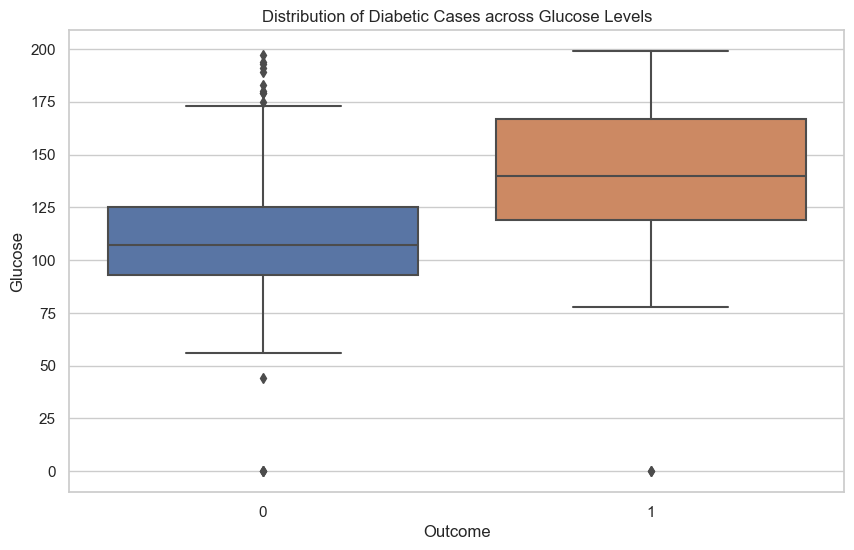

In [41]:
#Distribution of cases accross glucose level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Distribution of Diabetic Cases across Glucose Levels')
plt.show()
